In [13]:
%matplotlib inline
import sacc
import numpy as np
import matplotlib.pylab as plt
import astropy.io.fits as pyfits

In [5]:
# PSF systematics are controlled with the following 4 parameters
alpha2 = 0.5 # second-order PSF leakage
beta2 = 0.5 # second-order PSF error
alpha4 = 0.2 # Fourth-order PSF leakage
beta4 = 0.3 # Fourth-order PSF error

# Fourier Space

Text(0, 0.5, '$\\ell (\\ell+1) C_\\ell / (2 \\pi)$')

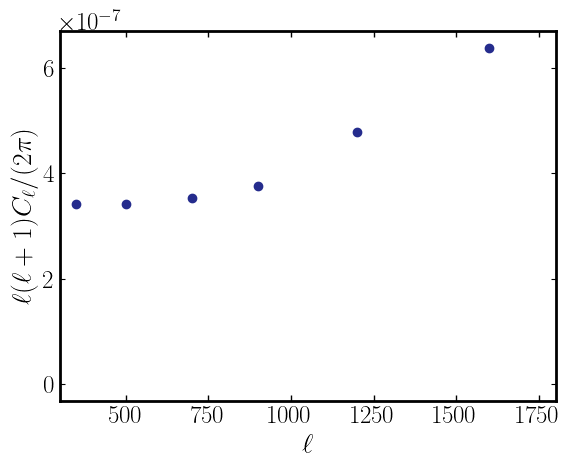

In [40]:
filename = "./fourierspace/ppcorr_psf_all_ells_lmax_1800_catalog2.npz"
filename2 = "./fourierspace/psf_transform_matrix_lmax_1800_catalog2.npz"
psf_ell_bins = sacc_data.get_ell_cl(data_type="cl_ee", tracer1="wl_0", tracer2="wl_0")[0]
psf_template = np.load(filename)['arr_1']
psf_transform_matrix = np.load(filename2)['arr_0']
psf_means = np.load(filename2)['arr_1']
sacc_data = sacc.Sacc.load_fits("./fourierspace/blinded2.sacc")

uncorrelated_p_arr = np.array([alpha2, beta2, alpha4, beta4])
p_arr = (
    np.linalg.inv(psf_transform_matrix)@uncorrelated_p_arr.T
).T + psf_means
delta_cl = np.zeros(len(psf_template[0][0]))
for i in range(4):
    for j in range(4):
        delta_cl += p_arr[i]*p_arr[j]*psf_template[i][j]
plt.plot(psf_ell_bins, delta_cl*psf_ell_bins*(psf_ell_bins+1) / np.pi/2.0, "o")
plt.xlim(300, 1800)
plt.xlabel("$\ell$")
plt.ylabel("$\ell (\ell+1) C_\ell / (2 \pi)$")

Text(0, 0.5, '$C_\\ell$')

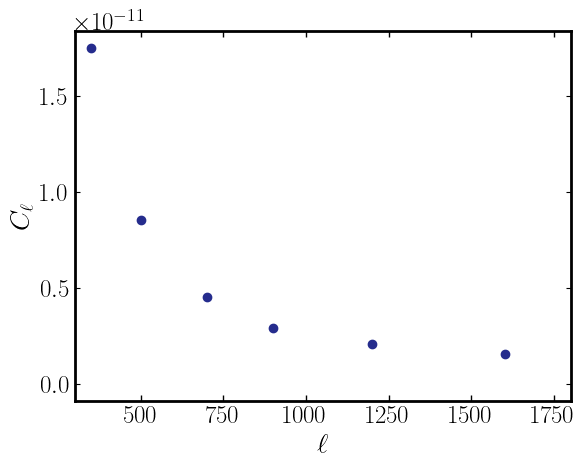

In [41]:
plt.plot(psf_ell_bins, delta_cl, "o")
plt.xlim(300, 1800)
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell$")